## Parte 2 - Mejoras

#### Estudio del efecto del parámetro batchsize en 50 epoch

In [0]:
# imports necesarios
import os
import subprocess
import torch 

In [2]:
# partimos del último notebook de la primera parte, donde se obtuvo aproximadamente una precisión del 35% en test.
# instalación de software necesario.
tmpdir = '/content/tmp/'

out=subprocess.call(["mkdir",tmpdir]) #create a empty directory
os.chdir(tmpdir) #move to directory

!wget http://www-vpu.eps.uam.es/~jcs/pub/utils.zip -O utils.zip #download utils
!unzip -o -q utils.zip -d . #unzip file

!pip install -r ./utils/requirements_cuda.txt

#flag to indicate that we want to use CUDA
use_cuda = True

--2019-02-19 16:30:43--  http://www-vpu.eps.uam.es/~jcs/pub/utils.zip
Resolving www-vpu.eps.uam.es (www-vpu.eps.uam.es)... 150.244.57.170
Connecting to www-vpu.eps.uam.es (www-vpu.eps.uam.es)|150.244.57.170|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2404 (2.3K) [application/zip]
Saving to: ‘utils.zip’

utils.zip           100%[===================>]   2.35K  --.-KB/s    in 0s      

2019-02-19 16:30:44 (272 MB/s) - ‘utils.zip’ saved [2404/2404]

    100% |████████████████████████████████| 496.9MB 110.2MB/s 
    100% |████████████████████████████████| 5.9MB 3.1MB/s 
imgaug 0.2.8 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
  Found existing installation: torch 1.0.1.post2
    Uninstalling torch-1.0.1.post2:
      Successfully uninstalled torch-1.0.1.post2
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [1]:
# conexión con GDrive y dataset a utilizar.
import os
import subprocess
from google.colab import drive

# establecimiento de ruta de trabajo y conexión con Gdrive
drivedir = '/content/gdrive'
pracdir = drivedir + '/My Drive/p1indexacion' #directory for practica 1 indexacion
datadir = pracdir + '/data' #directory for storing datasets
resudir = pracdir + '/result' #directory to save results

drive.mount(drivedir)

out=subprocess.call(["mkdir",pracdir])#create directory
out=subprocess.call(["mkdir",datadir])#create directory
out=subprocess.call(["mkdir",resudir])#create directory

os.chdir(datadir) #move to directory

#download and unzip the file
!wget http://www-vpu.eps.uam.es/~jcs/pub/Scene15.zip -O Scene15.zip
!unzip -o -q Scene15.zip -d .
print 'Dataset downloaded and unzipped'

tmpdir = '/content/tmp/'

out=subprocess.call(["mkdir",tmpdir]) #create a empty directory
os.chdir(tmpdir) #move to directory

#runs script and keeps variables
%run -i ./utils/mylenet.py

# path to the downloaded dataset
dataset_dir = datadir + '/Scene15/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
--2019-02-19 16:33:21--  http://www-vpu.eps.uam.es/~jcs/pub/Scene15.zip
Resolving www-vpu.eps.uam.es (www-vpu.eps.uam.es)... 150.244.57.170
Connecting to www-vpu.eps.uam.es (www-vpu.eps.uam.es)|150.244.57.170|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86395596 (82M) [application/zip]
Saving to: ‘Scene15.zip’

Scene15.zip         100%[===================>]  82.39M  17.5MB/s    in 14s     

2019-02-19 16:33:36 (5.74 MB/s) - ‘Scene1

In [0]:
# función parámetros para la generación del dataset
def parametros(batch_size, res_factor_x, res_factor_y):
    #data transformation
    Resizing_factor = (res_factor_x,res_factor_y)
    transform = transforms.Compose([ transforms.Resize(size=Resizing_factor),                                 
                                transforms.ToTensor()                                
                                ])

    #list & load images
    image_datasets = {x: datasets.ImageFolder(os.path.join(dataset_dir, x), transform) for x in ['train', 'val']}
    class_names = image_datasets['train'].classes

    #load & convert images to tensors in Python
    dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size, shuffle=True, num_workers=2) for x in ['train', 'val']}

    return image_datasets, class_names, dataloaders

  
# funciones necesarias para realizar los entrenamientos, cálculos y comparaciones  
def analisis_precision(number_epochs,epoch_train_acc,epoch_test_acc,resudir):
    t = range(number_epochs)
    lineObjects = plt.plot(t,epoch_train_acc,'r--',t,epoch_test_acc,'bs')
    plt.legend(lineObjects, ('train', 'test'))
    plt.ylabel('Accuracy (%)')
    plt.xlabel('Epoch')
    plt.title('Accuracy results')

    os.chdir(resudir) #move to drive directory for saving data

    plt.savefig('training_accuracy_baseline__epochs'+ str(number_epochs) + '_GPU.png',bbox_inches='tight') #call this function before "plt.show()"
    plt.show() 
  
    return 0


def funcion_perdidas(resudir,number_epochs,epoch_loss):
    os.chdir(resudir) #move to drive directory for saving data

    t = range(number_epochs)
    plt.plot(t,epoch_loss,'r--')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title('Epoch loss for training') 
    plt.show() 
  
    return 0
  

# function to show an image
def imshow(img):
    #img = img / 2 + 0.5  # unnormalize if normalization is done in transform
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  
  
  
def verificar_imagen(dataloaders,class_names,batch_size,net):
    #get sample data
    images, labels = iter(dataloaders['val']).next()
   
    # print images
    imshow(torchvision.utils.make_grid(images))
    print('GroundTruth: ', ' '.join('%5s' % class_names[labels[j]] for j in range(batch_size)))

    outputs = net(Variable(images.cuda()))
    _, predicted = torch.max(outputs.data, 1)

    print('Predicted: ', ' '.join('%5s' % class_names[predicted[j]] for j in range(batch_size)))
    
    return 0


def verificar_clases(class_names,dataloaders,net):
    class_correct = list(0. for i in range(len(class_names)))
    class_total = list(0. for i in range(len(class_names)))

    for data in dataloaders['val']:
        images, labels = data
        outputs = net(Variable(images.cuda()))
        _, predicted = torch.max(outputs.data, 1)
        c = (predicted == labels.cuda()).squeeze()
        
        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i]
            class_total[label] += 1

    class_totalT = 0
    for i in range(len(class_names)):
        print('Accuracy of %5s : %2d %%' % (class_names[i], 100 * class_correct[i] / class_total[i]))
        class_totalT += class_total[i]

    print('Total test data = %d images' % (class_totalT))
    
    return 0
  
  
def entrenamiento(display_batch_iter, number_epochs, image_datasets, dataloaders, batch_size, criterion, optimizer, net):
    epoch_loss =  np.zeros((number_epochs,1))
    epoch_train_acc =  np.zeros((number_epochs,1))
    epoch_test_acc =  np.zeros((number_epochs,1))  
    train_time =  0.0
    
    use_cuda = True

    Ntrain = len(image_datasets['train']) #number of samples for training
    Ntest = len(image_datasets['val']) #number of samples for test/validation
    
    start = time.time()

    if use_cuda and torch.cuda.is_available():
        print('Training in GPUmode #epochs=%d #batches=%d batchsize=%d' % (number_epochs, len(dataloaders['train']),batch_size))
    else:
        print('Training in CPUmode #epochs=%d #batches=%d batchsize=%d' % (number_epochs, len(dataloaders['train']),batch_size))

    print('**** Printing loss every %5d batches ****' % (display_batch_iter))  
    
    for epoch in range(number_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(dataloaders['train'], 0):
            # get the inputs
            inputs, labels = data

            # wrap them in Variable
            if use_cuda and torch.cuda.is_available():
                inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
            else:
                inputs, labels = Variable(inputs), Variable(labels)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.data[0]
            epoch_loss[epoch] += loss.data[0]
            if i % display_batch_iter == display_batch_iter-1:    # print every XXX mini-batches
                print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / display_batch_iter))
                running_loss = 0.0

        # compute accuracy on training set
        correct1 = 0.0
        for data in dataloaders['train']:    
            images, labels = data
            if use_cuda and torch.cuda.is_available():
                outputs = net(Variable(images.cuda()))
            else:
                outputs = net(Variable(images))
            _, predicted = torch.max(outputs.data, 1)
            if use_cuda and torch.cuda.is_available():
                correct1 += (predicted == labels.cuda()).sum()
            else:
                correct1 += (predicted == labels).sum()      
      
        # compute accuracy on test set
        correct2 = 0.0
        for data in dataloaders['val']:    
            images, labels = data
            if use_cuda and torch.cuda.is_available():
                outputs = net(Variable(images.cuda()))
            else:
                outputs = net(Variable(images))
            _, predicted = torch.max(outputs.data, 1)
            if use_cuda and torch.cuda.is_available():
                correct2 += (predicted == labels.cuda()).sum()
            else:
                correct2 += (predicted == labels).sum()
    
        epoch_loss[epoch] = epoch_loss[epoch] / len(dataloaders['train']) # average loss for each epoch
        epoch_train_acc[epoch] =  100 * correct1 / Ntrain   # average train accuracy for each epoch
        epoch_test_acc[epoch]  =  100 * correct2 / Ntest    # average test accuracy for each epoch
        print('Epoch %02d, loss: %1.3f, accuracy train: %2.3f %% (correct %04d total %04d ) accuracy test: %2.3f %% (correct %04d total %04d )' % (epoch + 1, epoch_loss[epoch], epoch_train_acc[epoch], correct1, Ntrain, epoch_test_acc[epoch], correct2, Ntest ))
    
    train_time = time.time() - start
    print('Finished Training (' + str(train_time) + ' secs)')
  
    return epoch_loss, epoch_train_acc, epoch_test_acc

  
def initialize_network(dataloaders, class_names, lr_ini, momentum_ini):
    images, labels = iter(dataloaders['train']).next()
    net = Net(input_shape=images[0].size(), num_outputs=len(class_names))
    
    use_cuda = True

    if use_cuda and torch.cuda.is_available():
        net.cuda()

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=lr_ini, momentum=momentum_ini)
    
    return net, criterion, optimizer
  

**MEJORA 1: Probar distintos valores de batch_size.**

**Probamos con batch_size = 2 y number_epochs = 30.**

In [0]:
import os
import torch 
from torchvision import datasets
import torchvision.transforms as transforms
import time
import numpy as np
from torch.autograd import Variable
import torch.optim as optim
import torch.nn as nn

# llamamos a la función con los parámetros batch_size = 2, y resizing factor=128x128
image_datasets, class_names, dataloaders = parametros(2, 128, 128)

# función initialize_network con los parámetros lr = 0.001 y momentum = 0.9
net, criterion, optimizer = initialize_network(dataloaders, class_names, 0.001, 0.9)

# llamar a función que entrena la red con los parámetros batch_size = 2, display_batch_iter = 100 y number_epochs = 30
epoch_loss, epoch_train_acc, epoch_test_acc = entrenamiento(100, 30, image_datasets, dataloaders, 2, criterion, optimizer, net)

Training in GPUmode #epochs=30 #batches=750 batchsize=2
**** Printing loss every   100 batches ****
[1,   100] loss: 2.711
[1,   200] loss: 2.710
[1,   300] loss: 2.706
[1,   400] loss: 2.716
[1,   500] loss: 2.712
[1,   600] loss: 2.714
[1,   700] loss: 2.716
Epoch 01, loss: 2.712, accuracy train: 6.667 % (correct 0100 total 1500 ) accuracy test: 3.886 % (correct 0116 total 2985 )
[2,   100] loss: 2.709
[2,   200] loss: 2.710
[2,   300] loss: 2.710
[2,   400] loss: 2.709
[2,   500] loss: 2.713
[2,   600] loss: 2.712
[2,   700] loss: 2.711
Epoch 02, loss: 2.711, accuracy train: 6.667 % (correct 0100 total 1500 ) accuracy test: 3.886 % (correct 0116 total 2985 )
[3,   100] loss: 2.709
[3,   200] loss: 2.708
[3,   300] loss: 2.711
[3,   400] loss: 2.711
[3,   500] loss: 2.710
[3,   600] loss: 2.712
[3,   700] loss: 2.711
Epoch 03, loss: 2.710, accuracy train: 9.667 % (correct 0145 total 1500 ) accuracy test: 9.715 % (correct 0290 total 2985 )
[4,   100] loss: 2.707
[4,   200] loss: 2.709

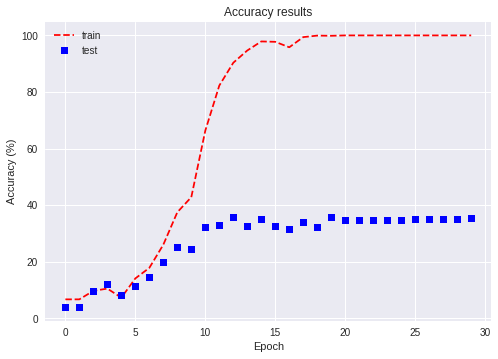

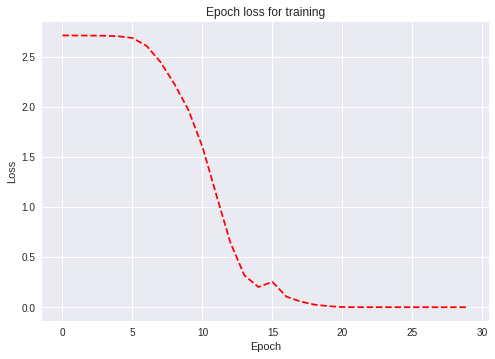

0

In [0]:
import matplotlib.pyplot as plt
import torchvision

# llamar a función que saca la gráfica de análisis de precisión con number_epochs = 30
analisis_precision(30,epoch_train_acc,epoch_test_acc,resudir)
# llamar a función que saca la gráfica de pérdida con number_epochs = 30
funcion_perdidas(resudir,30,epoch_loss)


('GroundTruth: ', 'Street Office')
('Predicted: ', 'TallBuilding Bedroom')
Accuracy of Bedroom : 17 %
Accuracy of Coast : 46 %
Accuracy of Forest : 43 %
Accuracy of Highway : 50 %
Accuracy of Industrial : 14 %
Accuracy of InsideCity : 19 %
Accuracy of Kitchen : 24 %
Accuracy of LivingRoom : 21 %
Accuracy of Mountain : 28 %
Accuracy of Office : 46 %
Accuracy of OpenCountry : 38 %
Accuracy of Store : 34 %
Accuracy of Street : 50 %
Accuracy of Suburb : 35 %
Accuracy of TallBuilding : 49 %
Total test data = 2985 images


0

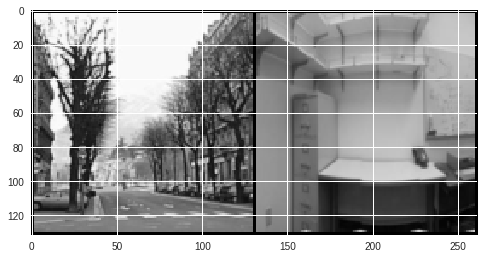

In [0]:
# llamar a funciones que validen los resultados tanto por imágenes como para cada clase, con batch_size = 2
verificar_imagen(dataloaders,class_names,2,net)
verificar_clases(class_names,dataloaders,net)

**Ahora probamos con batch_size = 8 y number_epochs = 30.**

In [0]:
import os
import torch 
from torchvision import datasets
import torchvision.transforms as transforms
import time
import numpy as np
from torch.autograd import Variable
import torch.optim as optim
import torch.nn as nn

# llamamos a la función con los parámetros batch_size = 8, y resizing factor=128x128
image_datasets_2, class_names_2, dataloaders_2 = parametros(8, 128, 128)

# función initialize_network con los parámetros lr = 0.001 y momentum = 0.9
net_2, criterion_2, optimizer_2 = initialize_network(dataloaders_2, class_names_2, 0.001, 0.9)

# llamar a función que entrena la red con los parámetros batch_size = 8, display_batch_iter = 100 y number_epochs = 30
epoch_loss_2, epoch_train_acc_2, epoch_test_acc_2 = entrenamiento(100, 30, image_datasets_2, dataloaders_2, 8, criterion_2, optimizer_2, net_2)

Training in GPUmode #epochs=30 #batches=188 batchsize=8
**** Printing loss every   100 batches ****
[1,   100] loss: 2.710
Epoch 01, loss: 2.709, accuracy train: 10.733 % (correct 0161 total 1500 ) accuracy test: 8.409 % (correct 0251 total 2985 )
[2,   100] loss: 2.700
Epoch 02, loss: 2.701, accuracy train: 10.733 % (correct 0161 total 1500 ) accuracy test: 6.868 % (correct 0205 total 2985 )
[3,   100] loss: 2.675
Epoch 03, loss: 2.666, accuracy train: 13.467 % (correct 0202 total 1500 ) accuracy test: 14.037 % (correct 0419 total 2985 )
[4,   100] loss: 2.602
Epoch 04, loss: 2.586, accuracy train: 15.200 % (correct 0228 total 1500 ) accuracy test: 13.400 % (correct 0400 total 2985 )
[5,   100] loss: 2.527
Epoch 05, loss: 2.514, accuracy train: 18.067 % (correct 0271 total 1500 ) accuracy test: 11.859 % (correct 0354 total 2985 )
[6,   100] loss: 2.484
Epoch 06, loss: 2.456, accuracy train: 23.467 % (correct 0352 total 1500 ) accuracy test: 18.023 % (correct 0538 total 2985 )
[7,   10

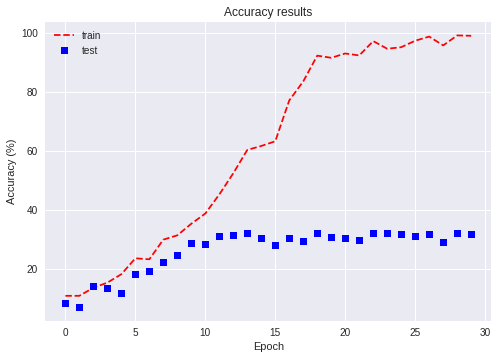

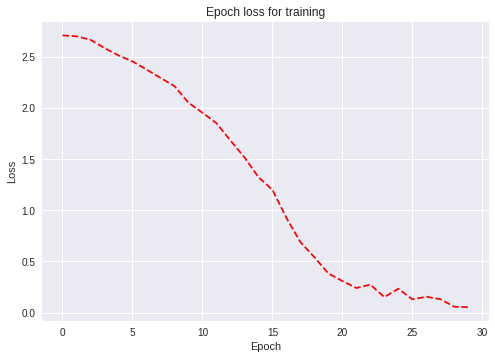

0

In [0]:
import matplotlib.pyplot as plt
import torchvision

# llamar a función que saca la gráfica de análisis de precisión con number_epochs = 30
analisis_precision(30,epoch_train_acc_2,epoch_test_acc_2,resudir)
# llamar a función que saca la gráfica de pérdida con number_epochs = 30
funcion_perdidas(resudir,30,epoch_loss_2)

('GroundTruth: ', 'Bedroom Office OpenCountry OpenCountry Store Highway TallBuilding Coast')
('Predicted: ', 'Mountain Store Mountain OpenCountry Store Highway Industrial Coast')
Accuracy of Bedroom : 25 %
Accuracy of Coast : 53 %
Accuracy of Forest : 28 %
Accuracy of Highway : 51 %
Accuracy of Industrial : 20 %
Accuracy of InsideCity : 24 %
Accuracy of Kitchen : 11 %
Accuracy of LivingRoom : 21 %
Accuracy of Mountain : 20 %
Accuracy of Office : 26 %
Accuracy of OpenCountry : 39 %
Accuracy of Store : 23 %
Accuracy of Street : 45 %
Accuracy of Suburb : 39 %
Accuracy of TallBuilding : 31 %
Total test data = 2985 images


0

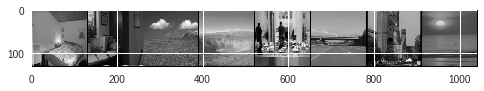

In [0]:
# llamar a funciones que validen los resultados tanto por imágenes como para cada clase, con batch_size = 8
verificar_imagen(dataloaders_2,class_names_2,8,net_2)
verificar_clases(class_names_2,dataloaders_2,net_2)

**Probamos con batch_size = 2 y number_epochs = 50.**

In [0]:
import os
import torch 
from torchvision import datasets
import torchvision.transforms as transforms
import time
import numpy as np
from torch.autograd import Variable
import torch.optim as optim
import torch.nn as nn

# llamamos a la función con los parámetros batch_size = 2, y resizing factor=128x128
image_datasets_3, class_names_3, dataloaders_3 = parametros(2, 128, 128)

# función initialize_network con los parámetros lr = 0.001 y momentum = 0.9
net_3, criterion_3, optimizer_3 = initialize_network(dataloaders_3, class_names_3, 0.001, 0.9)

# llamar a función que entrena la red con los parámetros batch_size = 2, display_batch_iter = 100 y number_epochs = 50
epoch_loss_3, epoch_train_acc_3, epoch_test_acc_3 = entrenamiento(100, 50, image_datasets_3, dataloaders_3, 2, criterion_3, optimizer_3, net_3)

Training in GPUmode #epochs=50 #batches=750 batchsize=2
**** Printing loss every   100 batches ****
[1,   100] loss: 2.707
[1,   200] loss: 2.717
[1,   300] loss: 2.714
[1,   400] loss: 2.709
[1,   500] loss: 2.708
[1,   600] loss: 2.715
[1,   700] loss: 2.705
Epoch 01, loss: 2.712, accuracy train: 6.933 % (correct 0104 total 1500 ) accuracy test: 8.844 % (correct 0264 total 2985 )
[2,   100] loss: 2.703
[2,   200] loss: 2.706
[2,   300] loss: 2.704
[2,   400] loss: 2.698
[2,   500] loss: 2.693
[2,   600] loss: 2.696
[2,   700] loss: 2.671
Epoch 02, loss: 2.692, accuracy train: 13.333 % (correct 0200 total 1500 ) accuracy test: 12.295 % (correct 0367 total 2985 )
[3,   100] loss: 2.625
[3,   200] loss: 2.558
[3,   300] loss: 2.558
[3,   400] loss: 2.605
[3,   500] loss: 2.577
[3,   600] loss: 2.634
[3,   700] loss: 2.553
Epoch 03, loss: 2.579, accuracy train: 15.933 % (correct 0239 total 1500 ) accuracy test: 13.199 % (correct 0394 total 2985 )
[4,   100] loss: 2.534
[4,   200] loss: 2

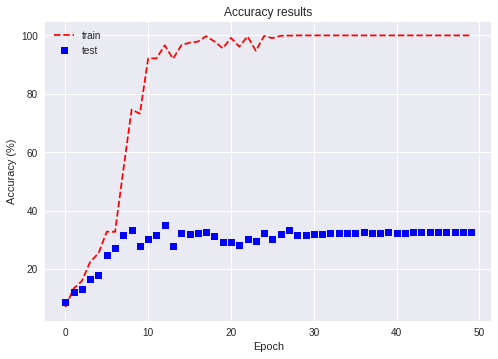

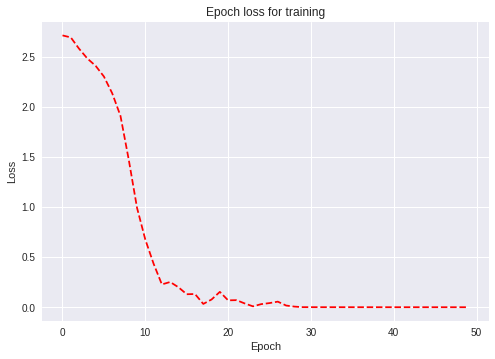

0

In [0]:
import matplotlib.pyplot as plt
import torchvision

# llamar a función que saca la gráfica de análisis de precisión con number_epochs = 50
analisis_precision(50,epoch_train_acc_3,epoch_test_acc_3,resudir)
# llamar a función que saca la gráfica de pérdida con number_epochs = 50
funcion_perdidas(resudir,50,epoch_loss_3)

('GroundTruth: ', 'Forest Forest')
('Predicted: ', 'LivingRoom Mountain')
Accuracy of Bedroom : 18 %
Accuracy of Coast : 47 %
Accuracy of Forest : 32 %
Accuracy of Highway : 50 %
Accuracy of Industrial : 14 %
Accuracy of InsideCity : 12 %
Accuracy of Kitchen : 19 %
Accuracy of LivingRoom : 28 %
Accuracy of Mountain : 21 %
Accuracy of Office : 43 %
Accuracy of OpenCountry : 40 %
Accuracy of Store : 26 %
Accuracy of Street : 45 %
Accuracy of Suburb : 51 %
Accuracy of TallBuilding : 35 %
Total test data = 2985 images


0

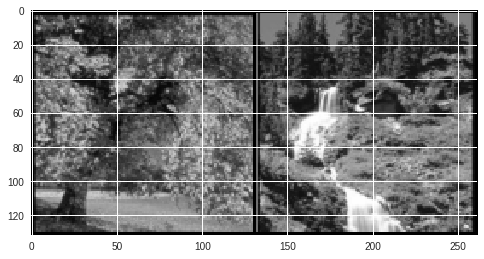

In [0]:
# llamar a funciones que validen los resultados tanto por imágenes como para cada clase, con batch_size = 2
verificar_imagen(dataloaders_3,class_names_3,2,net_3)
verificar_clases(class_names_3,dataloaders_3,net_3)

**Probamos con batch_size = 8 y number_epochs = 50.**

In [0]:
import os
import torch 
from torchvision import datasets
import torchvision.transforms as transforms
import time
import numpy as np
from torch.autograd import Variable
import torch.optim as optim
import torch.nn as nn

# llamamos a la función con los parámetros batch_size = 8, y resizing factor=128x128
image_datasets_4, class_names_4, dataloaders_4 = parametros(8, 128, 128)

# función initialize_network con los parámetros lr = 0.001 y momentum = 0.9
net_4, criterion_4, optimizer_4 = initialize_network(dataloaders_4, class_names_4, 0.001, 0.9)

# llamar a función que entrena la red con los parámetros batch_size = 2, display_batch_iter = 100 y number_epochs = 50
epoch_loss_4, epoch_train_acc_4, epoch_test_acc_4 = entrenamiento(100, 50, image_datasets_4, dataloaders_4, 8, criterion_4, optimizer_4, net_4)

Training in GPUmode #epochs=50 #batches=188 batchsize=8
**** Printing loss every   100 batches ****
[1,   100] loss: 2.711
Epoch 01, loss: 2.710, accuracy train: 6.733 % (correct 0101 total 1500 ) accuracy test: 9.213 % (correct 0275 total 2985 )
[2,   100] loss: 2.707
Epoch 02, loss: 2.710, accuracy train: 7.000 % (correct 0105 total 1500 ) accuracy test: 9.481 % (correct 0283 total 2985 )
[3,   100] loss: 2.708
Epoch 03, loss: 2.709, accuracy train: 6.667 % (correct 0100 total 1500 ) accuracy test: 9.179 % (correct 0274 total 2985 )
[4,   100] loss: 2.710
Epoch 04, loss: 2.709, accuracy train: 7.933 % (correct 0119 total 1500 ) accuracy test: 7.571 % (correct 0226 total 2985 )
[5,   100] loss: 2.709
Epoch 05, loss: 2.708, accuracy train: 11.267 % (correct 0169 total 1500 ) accuracy test: 12.831 % (correct 0383 total 2985 )
[6,   100] loss: 2.706
Epoch 06, loss: 2.707, accuracy train: 11.667 % (correct 0175 total 1500 ) accuracy test: 11.390 % (correct 0340 total 2985 )
[7,   100] los

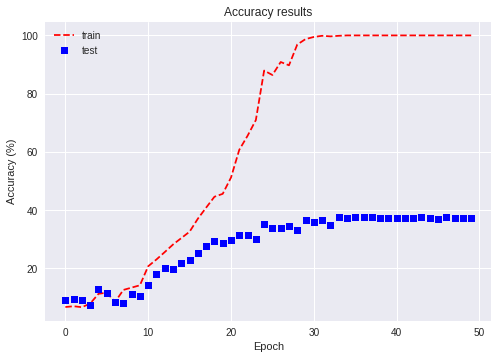

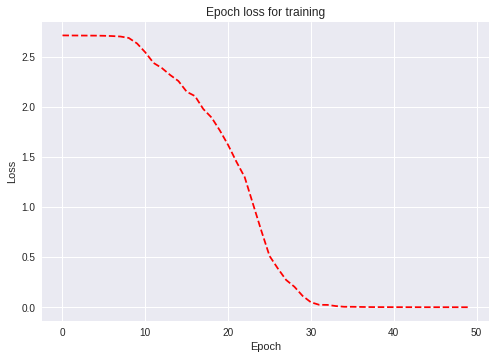

0

In [0]:
import matplotlib.pyplot as plt
import torchvision

# llamar a función que saca la gráfica de análisis de precisión con number_epochs = 50
analisis_precision(50,epoch_train_acc_4,epoch_test_acc_4,resudir)
# llamar a función que saca la gráfica de pérdida con number_epochs = 50
funcion_perdidas(resudir,50,epoch_loss_4)

('GroundTruth: ', 'Bedroom Street Bedroom Forest Bedroom OpenCountry OpenCountry OpenCountry')
('Predicted: ', 'Bedroom Street Kitchen LivingRoom InsideCity OpenCountry OpenCountry OpenCountry')
Accuracy of Bedroom : 36 %
Accuracy of Coast : 46 %
Accuracy of Forest : 39 %
Accuracy of Highway : 64 %
Accuracy of Industrial : 18 %
Accuracy of InsideCity : 22 %
Accuracy of Kitchen : 21 %
Accuracy of LivingRoom : 25 %
Accuracy of Mountain : 28 %
Accuracy of Office : 41 %
Accuracy of OpenCountry : 43 %
Accuracy of Store : 26 %
Accuracy of Street : 51 %
Accuracy of Suburb : 46 %
Accuracy of TallBuilding : 46 %
Total test data = 2985 images


0

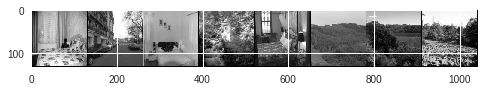

In [0]:
# llamar a funciones que validen los resultados tanto por imágenes como para cada clase, con batch_size = 8
verificar_imagen(dataloaders_4,class_names_4,8,net_4)
verificar_clases(class_names_4,dataloaders_4,net_4)

**MEJORA 2: Probar con distintos valores de resizing_factor.**

**Probamos con resizing_factor = 64x64.**

In [0]:
# Para estudiar el efecto de este parámetro vamos a probar con 3 valores diferentes del mismo, junto a batch_size=4 y number_epochs=30
# resizing_factor = 64x64
import os
import torch 
from torchvision import datasets
import torchvision.transforms as transforms
import time
import numpy as np
from torch.autograd import Variable
import torch.optim as optim
import torch.nn as nn

image_datasets_5, class_names_5, dataloaders_5 = parametros(4, 64, 64)

# función initialize_network con los parámetros lr = 0.001 y momentum = 0.9
net_5, criterion_5, optimizer_5 = initialize_network(dataloaders_5, class_names_5, 0.001, 0.9)

epoch_loss_5, epoch_train_acc_5, epoch_test_acc_5 = entrenamiento(100, 30, image_datasets_5, dataloaders_5, 4, criterion_5, optimizer_5, net_5)

Training in GPUmode #epochs=30 #batches=375 batchsize=4
**** Printing loss every   100 batches ****
[1,   100] loss: 2.710
[1,   200] loss: 2.709
[1,   300] loss: 2.712
Epoch 01, loss: 2.711, accuracy train: 6.667 % (correct 0100 total 1500 ) accuracy test: 7.203 % (correct 0215 total 2985 )
[2,   100] loss: 2.708
[2,   200] loss: 2.711
[2,   300] loss: 2.711
Epoch 02, loss: 2.710, accuracy train: 6.667 % (correct 0100 total 1500 ) accuracy test: 7.203 % (correct 0215 total 2985 )
[3,   100] loss: 2.711
[3,   200] loss: 2.708
[3,   300] loss: 2.708
Epoch 03, loss: 2.709, accuracy train: 6.667 % (correct 0100 total 1500 ) accuracy test: 7.203 % (correct 0215 total 2985 )
[4,   100] loss: 2.707
[4,   200] loss: 2.710
[4,   300] loss: 2.706
Epoch 04, loss: 2.708, accuracy train: 8.600 % (correct 0129 total 1500 ) accuracy test: 8.509 % (correct 0254 total 2985 )
[5,   100] loss: 2.707
[5,   200] loss: 2.707
[5,   300] loss: 2.706
Epoch 05, loss: 2.707, accuracy train: 7.600 % (correct 011

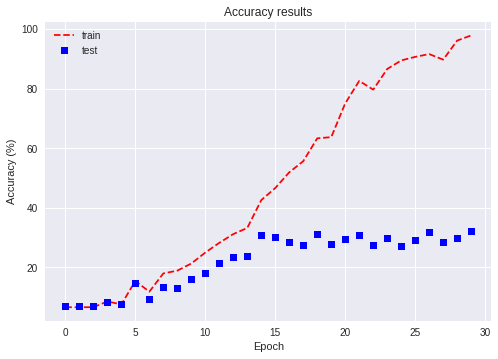

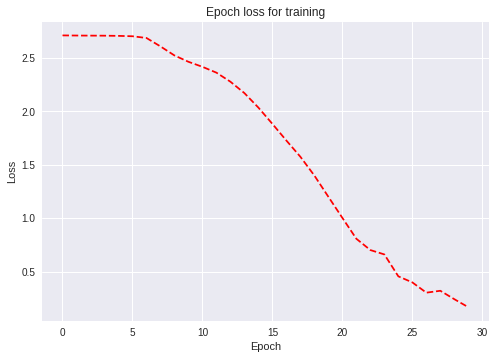

0

In [0]:
import matplotlib.pyplot as plt
import torchvision

analisis_precision(30,epoch_train_acc_5,epoch_test_acc_5,resudir)
funcion_perdidas(resudir,30,epoch_loss_5)

('GroundTruth: ', 'Store Kitchen TallBuilding LivingRoom')
('Predicted: ', 'Kitchen InsideCity Kitchen Bedroom')
Accuracy of Bedroom : 21 %
Accuracy of Coast : 51 %
Accuracy of Forest : 27 %
Accuracy of Highway : 43 %
Accuracy of Industrial : 17 %
Accuracy of InsideCity : 18 %
Accuracy of Kitchen : 10 %
Accuracy of LivingRoom : 21 %
Accuracy of Mountain : 21 %
Accuracy of Office : 28 %
Accuracy of OpenCountry : 47 %
Accuracy of Store : 11 %
Accuracy of Street : 44 %
Accuracy of Suburb : 44 %
Accuracy of TallBuilding : 49 %
Total test data = 2985 images


0

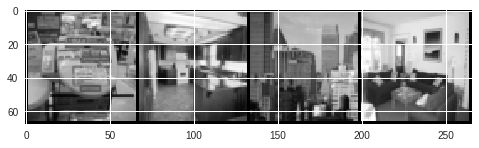

In [0]:
verificar_imagen(dataloaders_5,class_names_5,4,net_5)
verificar_clases(class_names_5,dataloaders_5,net_5)

**Probamos con valor de resizing_factor = 256x256.**

In [0]:
# Para estudiar el efecto de este parámetro vamos a probar con 3 valores diferentes del mismo, junto a batch_size=4 y number_epochs=30
# resizing_factor = 256x256
import os
import torch 
from torchvision import datasets
import torchvision.transforms as transforms
import time
import numpy as np
from torch.autograd import Variable
import torch.optim as optim
import torch.nn as nn

image_datasets_6, class_names_6, dataloaders_6 = parametros(4, 256, 256)

# función initialize_network con los parámetros lr = 0.001 y momentum = 0.9
net_6, criterion_6, optimizer_6 = initialize_network(dataloaders_6, class_names_6, 0.001, 0.9)

epoch_loss_6, epoch_train_acc_6, epoch_test_acc_6 = entrenamiento(100, 30, image_datasets_6, dataloaders_6, 4, criterion_6, optimizer_6, net_6)

Training in GPUmode #epochs=30 #batches=375 batchsize=4
**** Printing loss every   100 batches ****
[1,   100] loss: 2.710
[1,   200] loss: 2.709
[1,   300] loss: 2.707
Epoch 01, loss: 2.708, accuracy train: 10.333 % (correct 0155 total 1500 ) accuracy test: 11.859 % (correct 0354 total 2985 )
[2,   100] loss: 2.700
[2,   200] loss: 2.695
[2,   300] loss: 2.692
Epoch 02, loss: 2.689, accuracy train: 6.667 % (correct 0100 total 1500 ) accuracy test: 7.638 % (correct 0228 total 2985 )
[3,   100] loss: 2.640
[3,   200] loss: 2.654
[3,   300] loss: 2.652
Epoch 03, loss: 2.661, accuracy train: 6.667 % (correct 0100 total 1500 ) accuracy test: 8.710 % (correct 0260 total 2985 )
[4,   100] loss: 2.711
[4,   200] loss: 2.711
[4,   300] loss: 2.710
Epoch 04, loss: 2.712, accuracy train: 6.667 % (correct 0100 total 1500 ) accuracy test: 8.710 % (correct 0260 total 2985 )
[5,   100] loss: 2.710
[5,   200] loss: 2.709
[5,   300] loss: 2.711
Epoch 05, loss: 2.710, accuracy train: 6.800 % (correct 0

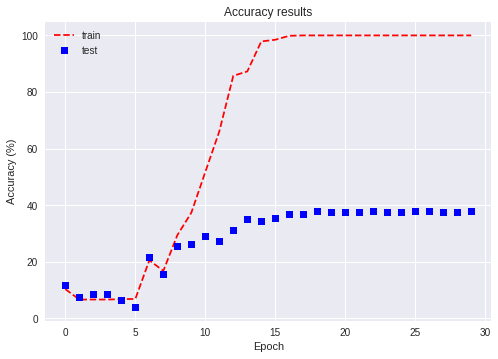

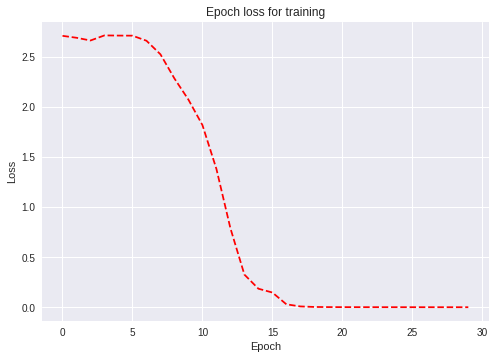

0

In [0]:
import matplotlib.pyplot as plt
import torchvision

analisis_precision(30,epoch_train_acc_6,epoch_test_acc_6,resudir)
funcion_perdidas(resudir,30,epoch_loss_6)

('GroundTruth: ', 'Bedroom Street Street Forest')
('Predicted: ', 'LivingRoom Kitchen Street Forest')
Accuracy of Bedroom : 12 %
Accuracy of Coast : 53 %
Accuracy of Forest : 67 %
Accuracy of Highway : 63 %
Accuracy of Industrial : 15 %
Accuracy of InsideCity : 18 %
Accuracy of Kitchen : 15 %
Accuracy of LivingRoom : 22 %
Accuracy of Mountain : 31 %
Accuracy of Office : 41 %
Accuracy of OpenCountry : 49 %
Accuracy of Store : 19 %
Accuracy of Street : 54 %
Accuracy of Suburb : 35 %
Accuracy of TallBuilding : 42 %
Total test data = 2985 images


0

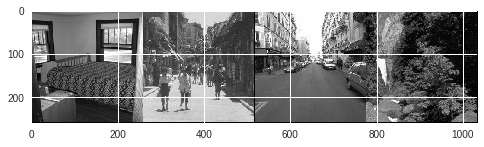

In [0]:
verificar_imagen(dataloaders_6,class_names_6,4,net_6)
verificar_clases(class_names_6,dataloaders_6,net_6)

**Probamos con valor resizing_factor = 512x512.**

In [0]:
# resizing_factor = 512x512
import os
import torch 
from torchvision import datasets
import torchvision.transforms as transforms
import time
import numpy as np
from torch.autograd import Variable
import torch.optim as optim
import torch.nn as nn

image_datasets_7, class_names_7, dataloaders_7 = parametros(4, 512, 512)

# función initialize_network con los parámetros lr = 0.001 y momentum = 0.9
net_7, criterion_7, optimizer_7 = initialize_network(dataloaders_7, class_names_7, 0.001, 0.9)

epoch_loss_7, epoch_train_acc_7, epoch_test_acc_7 = entrenamiento(100, 30, image_datasets_7, dataloaders_7, 4, criterion_7, optimizer_7, net_7)

Training in GPUmode #epochs=30 #batches=375 batchsize=4
**** Printing loss every   100 batches ****
[1,   100] loss: 2.709
[1,   200] loss: 2.713
[1,   300] loss: 2.708
Epoch 01, loss: 2.708, accuracy train: 11.200 % (correct 0168 total 1500 ) accuracy test: 8.643 % (correct 0258 total 2985 )
[2,   100] loss: 2.681
[2,   200] loss: 2.657
[2,   300] loss: 2.622
Epoch 02, loss: 2.632, accuracy train: 19.733 % (correct 0296 total 1500 ) accuracy test: 14.372 % (correct 0429 total 2985 )
[3,   100] loss: 2.566
[3,   200] loss: 2.512
[3,   300] loss: 2.479
Epoch 03, loss: 2.512, accuracy train: 20.267 % (correct 0304 total 1500 ) accuracy test: 16.650 % (correct 0497 total 2985 )
[4,   100] loss: 2.423
[4,   200] loss: 2.412
[4,   300] loss: 2.387
Epoch 04, loss: 2.405, accuracy train: 28.667 % (correct 0430 total 1500 ) accuracy test: 18.861 % (correct 0563 total 2985 )
[5,   100] loss: 2.350
[5,   200] loss: 2.284
[5,   300] loss: 2.249
Epoch 05, loss: 2.282, accuracy train: 33.200 % (cor

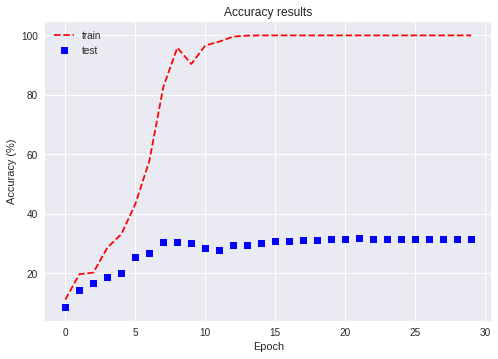

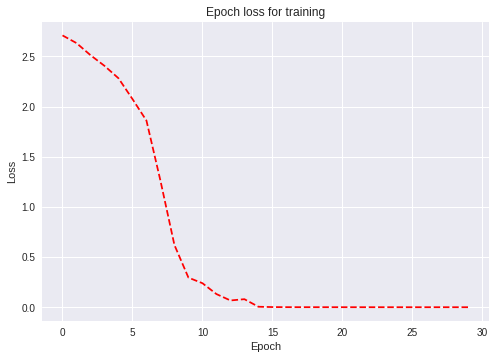

0

In [0]:
import matplotlib.pyplot as plt
import torchvision

analisis_precision(30,epoch_train_acc_7,epoch_test_acc_7,resudir)
funcion_perdidas(resudir,30,epoch_loss_7)

('GroundTruth: ', 'Forest Suburb Store Mountain')
('Predicted: ', 'InsideCity Suburb Kitchen Office')
Accuracy of Bedroom : 17 %
Accuracy of Coast : 38 %
Accuracy of Forest : 35 %
Accuracy of Highway : 61 %
Accuracy of Industrial : 17 %
Accuracy of InsideCity : 14 %
Accuracy of Kitchen : 10 %
Accuracy of LivingRoom : 20 %
Accuracy of Mountain : 17 %
Accuracy of Office : 60 %
Accuracy of OpenCountry : 37 %
Accuracy of Store : 38 %
Accuracy of Street : 32 %
Accuracy of Suburb : 43 %
Accuracy of TallBuilding : 33 %
Total test data = 2985 images


0

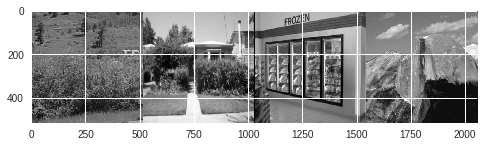

In [0]:
verificar_imagen(dataloaders_7,class_names_7,4,net_7)
verificar_clases(class_names_7,dataloaders_7,net_7)

**Después de hacer pruebas con distintos valores de batch_size y resizing_factor, probamos con una configuración de estos parámetros para ver si conseguimos mejorar los resultados obtenidos.**

In [0]:
# no uso de CUDA
use_cuda = False

def initialize_network(dataloaders, class_names, lr_ini, momentum_ini):
    images, labels = iter(dataloaders['train']).next()
    net = Net(input_shape=images[0].size(), num_outputs=len(class_names))
    
    use_cuda = False

    if use_cuda and torch.cuda.is_available():
        net.cuda()

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=lr_ini, momentum=momentum_ini)
    
    return net, criterion, optimizer

  
def verificar_imagen(dataloaders,class_names,batch_size,net):
    #get sample data
    images, labels = iter(dataloaders['val']).next()
   
    # print images
    imshow(torchvision.utils.make_grid(images))
    print('GroundTruth: ', ' '.join('%5s' % class_names[labels[j]] for j in range(batch_size)))

    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)

    print('Predicted: ', ' '.join('%5s' % class_names[predicted[j]] for j in range(batch_size)))
    
    return 0

  
def verificar_clases(class_names,dataloaders,net):
    class_correct = list(0. for i in range(len(class_names)))
    class_total = list(0. for i in range(len(class_names)))

    for data in dataloaders['val']:
        images, labels = data
        outputs = net(Variable(images))
        _, predicted = torch.max(outputs.data, 1)
        c = (predicted == labels).squeeze()
    
        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i]
            class_total[label] += 1

    class_totalT = 0
    for i in range(len(class_names)):
        print('Accuracy of %5s : %2d %%' % (class_names[i], 100 * class_correct[i] / class_total[i]))
        class_totalT += class_total[i]

    print('Total test data = %d images' % (class_totalT))
    
    return 0
  
  
def entrenamiento(display_batch_iter, number_epochs, image_datasets, dataloaders, batch_size, criterion, optimizer, net):
    epoch_loss =  np.zeros((number_epochs,1))
    epoch_train_acc =  np.zeros((number_epochs,1))
    epoch_test_acc =  np.zeros((number_epochs,1))  
    train_time =  0.0
    
    use_cuda = False

    Ntrain = len(image_datasets['train']) #number of samples for training
    Ntest = len(image_datasets['val']) #number of samples for test/validation
    
    start = time.time()

    if use_cuda and torch.cuda.is_available():
        print('Training in GPUmode #epochs=%d #batches=%d batchsize=%d' % (number_epochs, len(dataloaders['train']),batch_size))
    else:
        print('Training in CPUmode #epochs=%d #batches=%d batchsize=%d' % (number_epochs, len(dataloaders['train']),batch_size))

    print('**** Printing loss every %5d batches ****' % (display_batch_iter))  
    
    for epoch in range(number_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(dataloaders['train'], 0):
            # get the inputs
            inputs, labels = data

            # wrap them in Variable
            if use_cuda and torch.cuda.is_available():
                inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
            else:
                inputs, labels = Variable(inputs), Variable(labels)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.data[0]
            epoch_loss[epoch] += loss.data[0]
            if i % display_batch_iter == display_batch_iter-1:    # print every XXX mini-batches
                print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / display_batch_iter))
                running_loss = 0.0

        # compute accuracy on training set
        correct1 = 0.0
        for data in dataloaders['train']:    
            images, labels = data
            if use_cuda and torch.cuda.is_available():
                outputs = net(Variable(images.cuda()))
            else:
                outputs = net(Variable(images))
            _, predicted = torch.max(outputs.data, 1)
            if use_cuda and torch.cuda.is_available():
                correct1 += (predicted == labels.cuda()).sum()
            else:
                correct1 += (predicted == labels).sum()      
      
        # compute accuracy on test set
        correct2 = 0.0
        for data in dataloaders['val']:    
            images, labels = data
            if use_cuda and torch.cuda.is_available():
                outputs = net(Variable(images.cuda()))
            else:
                outputs = net(Variable(images))
            _, predicted = torch.max(outputs.data, 1)
            if use_cuda and torch.cuda.is_available():
                correct2 += (predicted == labels.cuda()).sum()
            else:
                correct2 += (predicted == labels).sum()
    
        epoch_loss[epoch] = epoch_loss[epoch] / len(dataloaders['train']) # average loss for each epoch
        epoch_train_acc[epoch] =  100 * correct1 / Ntrain   # average train accuracy for each epoch
        epoch_test_acc[epoch]  =  100 * correct2 / Ntest    # average test accuracy for each epoch
        print('Epoch %02d, loss: %1.3f, accuracy train: %2.3f %% (correct %04d total %04d ) accuracy test: %2.3f %% (correct %04d total %04d )' % (epoch + 1, epoch_loss[epoch], epoch_train_acc[epoch], correct1, Ntrain, epoch_test_acc[epoch], correct2, Ntest ))
    
    train_time = time.time() - start
    print('Finished Training (' + str(train_time) + ' secs)')
  
    return epoch_loss, epoch_train_acc, epoch_test_acc

In [0]:
# ultima ejecución
import os
import torch 
from torchvision import datasets
import torchvision.transforms as transforms
import time
import numpy as np
from torch.autograd import Variable
import torch.optim as optim
import torch.nn as nn

image_datasets_13, class_names_13, dataloaders_13 = parametros(16, 256, 256)

# función initialize_network con los parámetros lr = 0.001 y momentum = 0.9
net_13, criterion_13, optimizer_13 = initialize_network(dataloaders_13, class_names_13, 0.001, 0.9)

epoch_loss_13, epoch_train_acc_13, epoch_test_acc_13 = entrenamiento(100, 50, image_datasets_13, dataloaders_13, 16, criterion_13, optimizer_13, net_13)

Training in CPUmode #epochs=50 #batches=94 batchsize=16
**** Printing loss every   100 batches ****
Epoch 01, loss: 2.710, accuracy train: 13.533 % (correct 0203 total 1500 ) accuracy test: 8.308 % (correct 0248 total 2985 )
Epoch 02, loss: 2.706, accuracy train: 10.000 % (correct 0150 total 1500 ) accuracy test: 8.074 % (correct 0241 total 2985 )
Epoch 03, loss: 2.699, accuracy train: 12.467 % (correct 0187 total 1500 ) accuracy test: 10.955 % (correct 0327 total 2985 )
Epoch 04, loss: 2.679, accuracy train: 13.467 % (correct 0202 total 1500 ) accuracy test: 10.017 % (correct 0299 total 2985 )
Epoch 05, loss: 2.620, accuracy train: 16.667 % (correct 0250 total 1500 ) accuracy test: 13.065 % (correct 0390 total 2985 )
Epoch 06, loss: 2.547, accuracy train: 17.133 % (correct 0257 total 1500 ) accuracy test: 12.630 % (correct 0377 total 2985 )
Epoch 07, loss: 2.493, accuracy train: 16.067 % (correct 0241 total 1500 ) accuracy test: 12.931 % (correct 0386 total 2985 )
Epoch 08, loss: 2.44

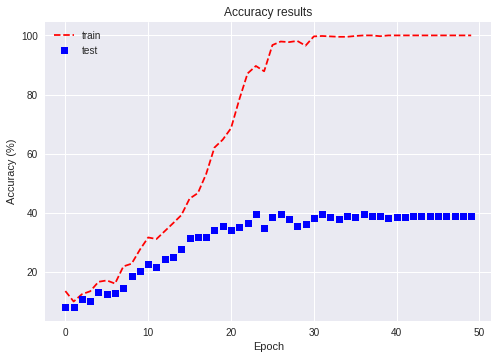

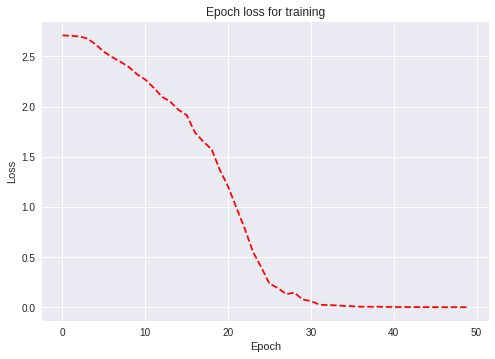

0

In [0]:
import matplotlib.pyplot as plt
import torchvision

analisis_precision(50,epoch_train_acc_13,epoch_test_acc_13,resudir)
funcion_perdidas(resudir,50,epoch_loss_13)

('GroundTruth: ', 'InsideCity OpenCountry TallBuilding Street Mountain Kitchen Industrial Coast LivingRoom OpenCountry InsideCity InsideCity Suburb OpenCountry InsideCity Kitchen')
('Predicted: ', 'Store Coast Mountain Street OpenCountry Office Street TallBuilding Forest Coast Forest Industrial Suburb OpenCountry Industrial Mountain')
Accuracy of Bedroom : 28 %
Accuracy of Coast : 49 %
Accuracy of Forest : 58 %
Accuracy of Highway : 69 %
Accuracy of Industrial : 14 %
Accuracy of InsideCity : 22 %
Accuracy of Kitchen : 17 %
Accuracy of LivingRoom : 25 %
Accuracy of Mountain : 30 %
Accuracy of Office : 49 %
Accuracy of OpenCountry : 45 %
Accuracy of Store : 22 %
Accuracy of Street : 56 %
Accuracy of Suburb : 42 %
Accuracy of TallBuilding : 41 %
Total test data = 2985 images


0

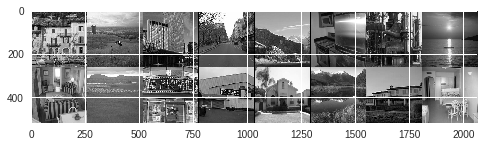

In [0]:
verificar_imagen(dataloaders_13,class_names_13,16,net_13)
verificar_clases(class_names_13,dataloaders_13,net_13)

#### MEJORA 3: Explore el uso de normalización de imágenes como última operación de una transformación compuesta. Ejemplo en el siguiente fichero: https://github.com/pytorch/examples/blob/master/imagenet/main.py

In [0]:
# añadimos normalización a las transformaciones que se realizan a los datos
def parametros_norm(batch_size, res_factor_x, res_factor_y):
    #data transformation
    Resizing_factor = (res_factor_x,res_factor_y)
    transform = transforms.Compose([ transforms.Resize(size=Resizing_factor),                                 
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])

    #list & load images
    image_datasets = {x: datasets.ImageFolder(os.path.join(dataset_dir, x), transform) for x in ['train', 'val']}
    class_names = image_datasets['train'].classes

    #load & convert images to tensors in Python
    dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size, shuffle=True, num_workers=2) for x in ['train', 'val']}

    return image_datasets, class_names, dataloaders

In [0]:
# prueba trás la normalización. Bajamos el número de epochs a 30.
import os
import torch 
from torchvision import datasets
import torchvision.transforms as transforms
import time
import numpy as np
from torch.autograd import Variable
import torch.optim as optim
import torch.nn as nn

image_datasets_8, class_names_8, dataloaders_8 = parametros_norm(16, 256, 256)

# función initialize_network con los parámetros lr = 0.001 y momentum = 0.9
net_8, criterion_8, optimizer_8 = initialize_network(dataloaders_8, class_names_8, 0.001, 0.9)

epoch_loss_8, epoch_train_acc_8, epoch_test_acc_8 = entrenamiento(100, 30, image_datasets_8, dataloaders_8, 16, criterion_8, optimizer_8, net_8)

Training in CPUmode #epochs=30 #batches=94 batchsize=16
**** Printing loss every   100 batches ****
Epoch 01, loss: 2.700, accuracy train: 6.867 % (correct 0103 total 1500 ) accuracy test: 7.806 % (correct 0233 total 2985 )
Epoch 02, loss: 2.616, accuracy train: 21.200 % (correct 0318 total 1500 ) accuracy test: 19.095 % (correct 0570 total 2985 )
Epoch 03, loss: 2.313, accuracy train: 32.133 % (correct 0482 total 1500 ) accuracy test: 24.992 % (correct 0746 total 2985 )
Epoch 04, loss: 1.999, accuracy train: 43.400 % (correct 0651 total 1500 ) accuracy test: 30.586 % (correct 0913 total 2985 )
Epoch 05, loss: 1.770, accuracy train: 52.333 % (correct 0785 total 1500 ) accuracy test: 33.333 % (correct 0995 total 2985 )
Epoch 06, loss: 1.501, accuracy train: 63.867 % (correct 0958 total 1500 ) accuracy test: 37.755 % (correct 1127 total 2985 )
Epoch 07, loss: 1.121, accuracy train: 81.733 % (correct 1226 total 1500 ) accuracy test: 43.987 % (correct 1313 total 2985 )
Epoch 08, loss: 0.72

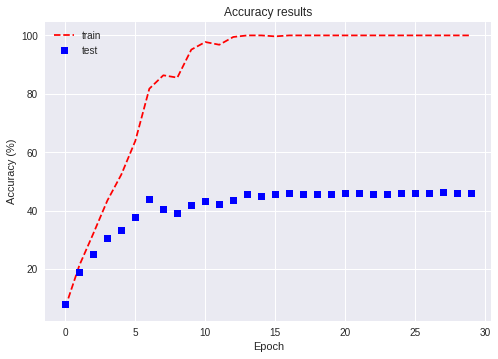

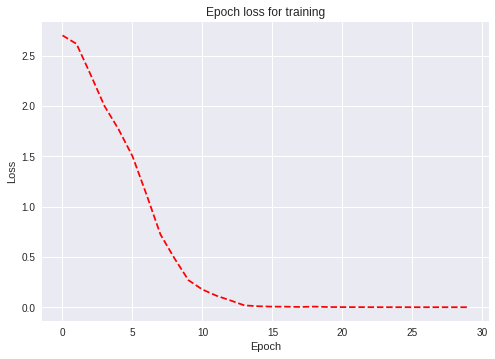

0

In [0]:
import matplotlib.pyplot as plt
import torchvision

analisis_precision(30,epoch_train_acc_8,epoch_test_acc_8,resudir)
funcion_perdidas(resudir,30,epoch_loss_8)

('GroundTruth: ', 'Store OpenCountry TallBuilding Industrial Industrial Mountain TallBuilding Coast Highway Street Mountain Store TallBuilding Bedroom Highway Store')
('Predicted: ', 'Store Office TallBuilding LivingRoom Industrial Mountain Store Coast OpenCountry Kitchen OpenCountry Kitchen Industrial Bedroom Highway Store')
Accuracy of Bedroom : 33 %
Accuracy of Coast : 56 %
Accuracy of Forest : 68 %
Accuracy of Highway : 70 %
Accuracy of Industrial : 25 %
Accuracy of InsideCity : 23 %
Accuracy of Kitchen : 18 %
Accuracy of LivingRoom : 31 %
Accuracy of Mountain : 29 %
Accuracy of Office : 48 %
Accuracy of OpenCountry : 56 %
Accuracy of Store : 46 %
Accuracy of Street : 59 %
Accuracy of Suburb : 63 %
Accuracy of TallBuilding : 45 %
Total test data = 2985 images


0

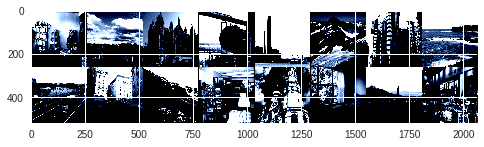

In [0]:
verificar_imagen(dataloaders_8,class_names_8,16,net_8)
verificar_clases(class_names_8,dataloaders_8,net_8)

#### MEJORA 4: Explore y compare distintas estrategias de optimización (más info en http://pytorch.org/docs/master/optim.html)

In [0]:
# modificamos la función de inicialización de la red usando algún tipo distinto de optimizador y viendo los resultados obtenidos
def initialize_network(dataloaders, class_names, lr_ini, momentum_ini):
    images, labels = iter(dataloaders['train']).next()
    net = Net(input_shape=images[0].size(), num_outputs=len(class_names))
    
    use_cuda = True

    if use_cuda and torch.cuda.is_available():
        net.cuda()

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=lr_ini, momentum=momentum_ini)
    
    return net, criterion, optimizer
  

def initialize_network_Adam(dataloaders, class_names, lr_ini):
    images, labels = iter(dataloaders['train']).next()
    net = Net(input_shape=images[0].size(), num_outputs=len(class_names))
    
    use_cuda = True

    if use_cuda and torch.cuda.is_available():
        net.cuda()

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters(), lr = lr_ini)
    
    return net, criterion, optimizer
  
  
def initialize_network_Adadelta(dataloaders, class_names, lr_ini):
    images, labels = iter(dataloaders['train']).next()
    net = Net(input_shape=images[0].size(), num_outputs=len(class_names))
    
    use_cuda = True

    if use_cuda and torch.cuda.is_available():
        net.cuda()

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adadelta(net.parameters(), lr=lr_ini, rho=0.9, eps=1e-06, weight_decay=1e-2)
    
    return net, criterion, optimizer

In [0]:
# prueba con el optimizador tipo Adam.
import os
import torch 
from torchvision import datasets
import torchvision.transforms as transforms
import time
import numpy as np
from torch.autograd import Variable
import torch.optim as optim
import torch.nn as nn

image_datasets_9, class_names_9, dataloaders_9 = parametros_norm(16, 256, 256)

net_9, criterion_9, optimizer_9 = initialize_network_Adam(dataloaders_9, class_names_9, 0.001)

epoch_loss_9, epoch_train_acc_9, epoch_test_acc_9 = entrenamiento(100, 30, image_datasets_9, dataloaders_9, 16, criterion_9, optimizer_9, net_9)

Training in CPUmode #epochs=30 #batches=94 batchsize=16
**** Printing loss every   100 batches ****
Epoch 01, loss: 2.467, accuracy train: 33.400 % (correct 0501 total 1500 ) accuracy test: 27.873 % (correct 0832 total 2985 )
Epoch 02, loss: 1.773, accuracy train: 66.533 % (correct 0998 total 1500 ) accuracy test: 37.119 % (correct 1108 total 2985 )
Epoch 03, loss: 0.907, accuracy train: 91.000 % (correct 1365 total 1500 ) accuracy test: 45.662 % (correct 1363 total 2985 )
Epoch 04, loss: 0.236, accuracy train: 98.067 % (correct 1471 total 1500 ) accuracy test: 43.685 % (correct 1304 total 2985 )
Epoch 05, loss: 0.095, accuracy train: 99.733 % (correct 1496 total 1500 ) accuracy test: 46.466 % (correct 1387 total 2985 )
Epoch 06, loss: 0.018, accuracy train: 99.600 % (correct 1494 total 1500 ) accuracy test: 45.561 % (correct 1360 total 2985 )
Epoch 07, loss: 0.019, accuracy train: 100.000 % (correct 1500 total 1500 ) accuracy test: 45.193 % (correct 1349 total 2985 )
Epoch 08, loss: 0

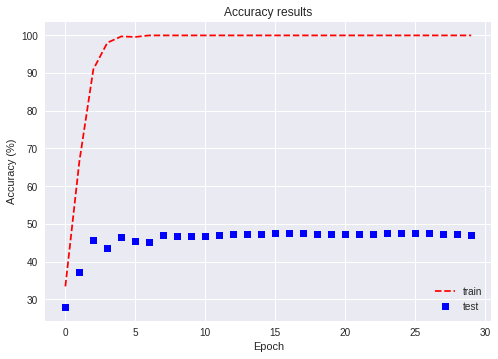

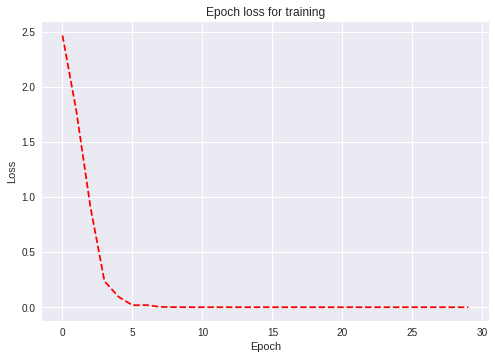

0

In [0]:
import matplotlib.pyplot as plt
import torchvision

analisis_precision(30,epoch_train_acc_9,epoch_test_acc_9,resudir)
funcion_perdidas(resudir,30,epoch_loss_9)

('GroundTruth: ', 'OpenCountry Street Suburb OpenCountry LivingRoom Coast Office Forest Mountain Coast Street LivingRoom OpenCountry Coast Street Highway')
('Predicted: ', 'Coast Street Suburb OpenCountry Bedroom Street Office Forest Forest Coast Street Bedroom OpenCountry Coast Street Highway')
Accuracy of Bedroom : 41 %
Accuracy of Coast : 58 %
Accuracy of Forest : 68 %
Accuracy of Highway : 68 %
Accuracy of Industrial : 25 %
Accuracy of InsideCity : 22 %
Accuracy of Kitchen : 29 %
Accuracy of LivingRoom : 30 %
Accuracy of Mountain : 31 %
Accuracy of Office : 48 %
Accuracy of OpenCountry : 54 %
Accuracy of Store : 45 %
Accuracy of Street : 60 %
Accuracy of Suburb : 53 %
Accuracy of TallBuilding : 56 %
Total test data = 2985 images


0

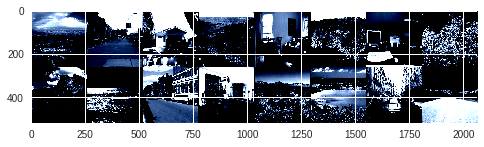

In [0]:
verificar_imagen(dataloaders_9,class_names_9,16,net_9)
verificar_clases(class_names_9,dataloaders_9,net_9)

In [0]:
# prueba con el optimizador tipo Adadelta
import os
import torch 
from torchvision import datasets
import torchvision.transforms as transforms
import time
import numpy as np
from torch.autograd import Variable
import torch.optim as optim
import torch.nn as nn

image_datasets_10, class_names_10, dataloaders_10 = parametros_norm(16, 256, 256)

net_10, criterion_10, optimizer_10 = initialize_network_Adadelta(dataloaders_10, class_names_10, 0.001)

epoch_loss_10, epoch_train_acc_10, epoch_test_acc_10 = entrenamiento(100, 30, image_datasets_10, dataloaders_10, 16, criterion_10, optimizer_10, net_10)

Training in CPUmode #epochs=30 #batches=94 batchsize=16
**** Printing loss every   100 batches ****
Epoch 01, loss: 2.704, accuracy train: 9.400 % (correct 0141 total 1500 ) accuracy test: 7.203 % (correct 0215 total 2985 )
Epoch 02, loss: 2.690, accuracy train: 15.667 % (correct 0235 total 1500 ) accuracy test: 12.663 % (correct 0378 total 2985 )
Epoch 03, loss: 2.676, accuracy train: 18.400 % (correct 0276 total 1500 ) accuracy test: 14.707 % (correct 0439 total 2985 )
Epoch 04, loss: 2.660, accuracy train: 19.133 % (correct 0287 total 1500 ) accuracy test: 15.544 % (correct 0464 total 2985 )
Epoch 05, loss: 2.643, accuracy train: 21.200 % (correct 0318 total 1500 ) accuracy test: 16.583 % (correct 0495 total 2985 )
Epoch 06, loss: 2.625, accuracy train: 22.867 % (correct 0343 total 1500 ) accuracy test: 17.454 % (correct 0521 total 2985 )
Epoch 07, loss: 2.604, accuracy train: 23.067 % (correct 0346 total 1500 ) accuracy test: 17.119 % (correct 0511 total 2985 )
Epoch 08, loss: 2.58

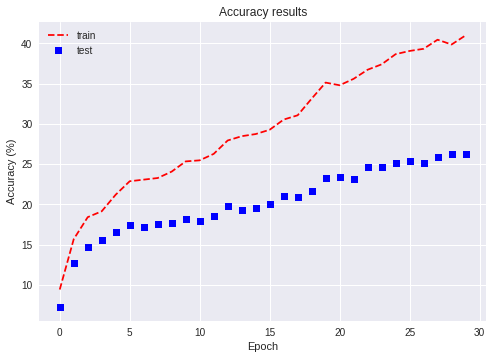

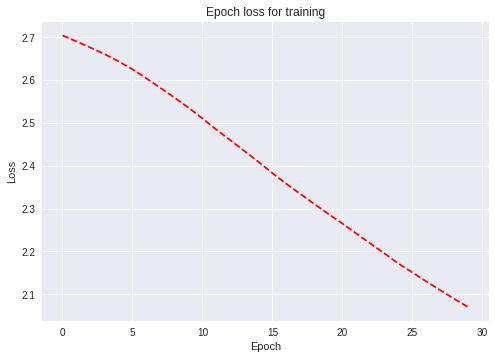

0

In [0]:
import matplotlib.pyplot as plt
import torchvision

analisis_precision(30,epoch_train_acc_10,epoch_test_acc_10,resudir)
funcion_perdidas(resudir,30,epoch_loss_10)

('GroundTruth: ', 'InsideCity Mountain Industrial Store Mountain Coast Store LivingRoom Bedroom Mountain Coast Store Industrial TallBuilding Bedroom TallBuilding')
('Predicted: ', 'Office Mountain Forest Suburb Highway Highway TallBuilding TallBuilding Store Coast Highway Store Industrial Kitchen Bedroom TallBuilding')
Accuracy of Bedroom : 25 %
Accuracy of Coast :  5 %
Accuracy of Forest : 47 %
Accuracy of Highway : 61 %
Accuracy of Industrial : 22 %
Accuracy of InsideCity : 17 %
Accuracy of Kitchen :  9 %
Accuracy of LivingRoom :  9 %
Accuracy of Mountain :  4 %
Accuracy of Office : 46 %
Accuracy of OpenCountry : 23 %
Accuracy of Store : 17 %
Accuracy of Street : 57 %
Accuracy of Suburb : 58 %
Accuracy of TallBuilding : 19 %
Total test data = 2985 images


0

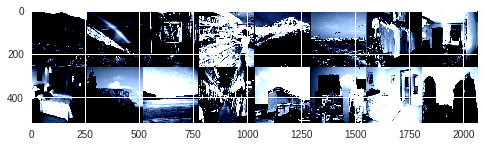

In [0]:
verificar_imagen(dataloaders_10,class_names_10,16,net_10)
verificar_clases(class_names_10,dataloaders_10,net_10)

#### MEJORA 5: Explore y compare una aplicación progresiva de un factor learning rate mediante el elemento lr_scheduler (http://pytorch.org/docs/master/_modules/torch/optim/lr_scheduler.html)

In [0]:
# modificamos la función de inicialización de la red para el uso de lr_scheduler de tipo CosineAnnealingLR
def initialize_network_scheduler(dataloaders, class_names, lr_ini, momentum_ini):
    images, labels = iter(dataloaders['train']).next()
    net = Net(input_shape=images[0].size(), num_outputs=len(class_names))
    
    use_cuda = True

    if use_cuda and torch.cuda.is_available():
        net.cuda()

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=lr_ini, momentum=momentum_ini)
    steps = 10
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, steps)
    
    return net, criterion, optimizer, scheduler
  

# modificamos para añadir scheduler.step()
def entrenamiento_scheduler(display_batch_iter, number_epochs, image_datasets, dataloaders, batch_size, criterion, optimizer, net, scheduler):
    epoch_loss =  np.zeros((number_epochs,1))
    epoch_train_acc =  np.zeros((number_epochs,1))
    epoch_test_acc =  np.zeros((number_epochs,1))  
    train_time =  0.0
    
    use_cuda = True

    Ntrain = len(image_datasets['train']) #number of samples for training
    Ntest = len(image_datasets['val']) #number of samples for test/validation
    
    start = time.time()

    if use_cuda and torch.cuda.is_available():
        print('Training in GPUmode #epochs=%d #batches=%d batchsize=%d' % (number_epochs, len(dataloaders['train']),batch_size))
    else:
        print('Training in CPUmode #epochs=%d #batches=%d batchsize=%d' % (number_epochs, len(dataloaders['train']),batch_size))

    print('**** Printing loss every %5d batches ****' % (display_batch_iter))  
    
    for epoch in range(number_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(dataloaders['train'], 0):
            # get the inputs
            inputs, labels = data

            # wrap them in Variable
            if use_cuda and torch.cuda.is_available():
                inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
            else:
                inputs, labels = Variable(inputs), Variable(labels)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            scheduler.step()

            # print statistics
            running_loss += loss.data[0]
            epoch_loss[epoch] += loss.data[0]
            if i % display_batch_iter == display_batch_iter-1:    # print every XXX mini-batches
                print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / display_batch_iter))
                running_loss = 0.0

        # compute accuracy on training set
        correct1 = 0.0
        for data in dataloaders['train']:    
            images, labels = data
            if use_cuda and torch.cuda.is_available():
                outputs = net(Variable(images.cuda()))
            else:
                outputs = net(Variable(images))
            _, predicted = torch.max(outputs.data, 1)
            if use_cuda and torch.cuda.is_available():
                correct1 += (predicted == labels.cuda()).sum()
            else:
                correct1 += (predicted == labels).sum()      
      
        # compute accuracy on test set
        correct2 = 0.0
        for data in dataloaders['val']:    
            images, labels = data
            if use_cuda and torch.cuda.is_available():
                outputs = net(Variable(images.cuda()))
            else:
                outputs = net(Variable(images))
            _, predicted = torch.max(outputs.data, 1)
            if use_cuda and torch.cuda.is_available():
                correct2 += (predicted == labels.cuda()).sum()
            else:
                correct2 += (predicted == labels).sum()
    
        epoch_loss[epoch] = epoch_loss[epoch] / len(dataloaders['train']) # average loss for each epoch
        epoch_train_acc[epoch] =  100 * correct1 / Ntrain   # average train accuracy for each epoch
        epoch_test_acc[epoch]  =  100 * correct2 / Ntest    # average test accuracy for each epoch
        print('Epoch %02d, loss: %1.3f, accuracy train: %2.3f %% (correct %04d total %04d ) accuracy test: %2.3f %% (correct %04d total %04d )' % (epoch + 1, epoch_loss[epoch], epoch_train_acc[epoch], correct1, Ntrain, epoch_test_acc[epoch], correct2, Ntest ))
    
    train_time = time.time() - start
    print('Finished Training (' + str(train_time) + ' secs)')
  
    return epoch_loss, epoch_train_acc, epoch_test_acc


In [8]:
# prueba con un tipo de lr_scheduler
import os
import torch 
from torchvision import datasets
import torchvision.transforms as transforms
import time
import numpy as np
from torch.autograd import Variable
import torch.optim as optim
import torch.nn as nn

image_datasets_11, class_names_11, dataloaders_11 = parametros_norm(16, 256, 256)

# función initialize_network con los parámetros lr = 0.001 y momentum = 0.9
net_11, criterion_11, optimizer_11, scheduler = initialize_network_scheduler(dataloaders_11, class_names_11, 0.001, 0.9)

epoch_loss_11, epoch_train_acc_11, epoch_test_acc_11 = entrenamiento_scheduler(100, 30, image_datasets_11, dataloaders_11, 16, criterion_11, optimizer_11, net_11, scheduler)

Training in CPUmode #epochs=30 #batches=94 batchsize=16
**** Printing loss every   100 batches ****
Epoch 01, loss: 2.698, accuracy train: 17.267 % (correct 0259 total 1500 ) accuracy test: 17.990 % (correct 0537 total 2985 )
Epoch 02, loss: 2.622, accuracy train: 21.800 % (correct 0327 total 1500 ) accuracy test: 19.397 % (correct 0579 total 2985 )
Epoch 03, loss: 2.416, accuracy train: 30.067 % (correct 0451 total 1500 ) accuracy test: 22.647 % (correct 0676 total 2985 )
Epoch 04, loss: 2.196, accuracy train: 36.667 % (correct 0550 total 1500 ) accuracy test: 27.973 % (correct 0835 total 2985 )
Epoch 05, loss: 2.092, accuracy train: 34.067 % (correct 0511 total 1500 ) accuracy test: 27.203 % (correct 0812 total 2985 )
Epoch 06, loss: 1.884, accuracy train: 47.267 % (correct 0709 total 1500 ) accuracy test: 30.988 % (correct 0925 total 2985 )
Epoch 07, loss: 1.723, accuracy train: 56.933 % (correct 0854 total 1500 ) accuracy test: 33.936 % (correct 1013 total 2985 )
Epoch 08, loss: 1.

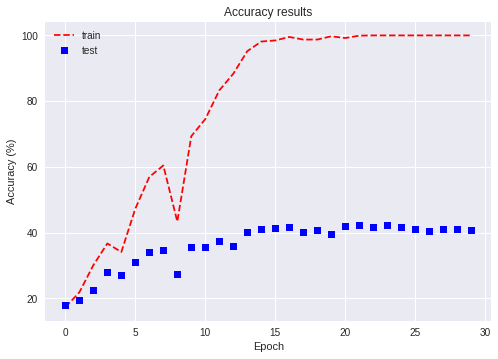

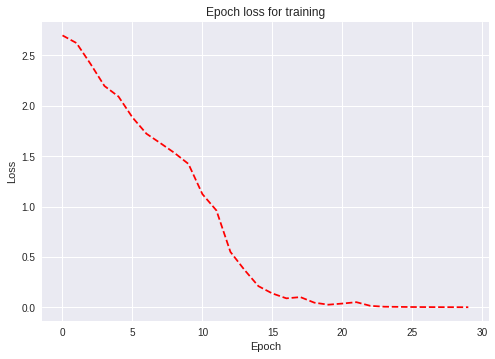

0

In [9]:
import matplotlib.pyplot as plt
import torchvision

analisis_precision(30,epoch_train_acc_11,epoch_test_acc_11,resudir)
funcion_perdidas(resudir,30,epoch_loss_11)

('GroundTruth: ', 'Street OpenCountry LivingRoom Mountain TallBuilding Office LivingRoom Bedroom LivingRoom Kitchen Coast Street OpenCountry InsideCity Street Mountain')
('Predicted: ', 'InsideCity OpenCountry Kitchen Mountain TallBuilding Office Kitchen Bedroom LivingRoom Kitchen OpenCountry Street Kitchen Kitchen Street OpenCountry')
Accuracy of Bedroom : 37 %
Accuracy of Coast : 49 %
Accuracy of Forest : 66 %
Accuracy of Highway : 68 %
Accuracy of Industrial : 19 %
Accuracy of InsideCity : 15 %
Accuracy of Kitchen : 21 %
Accuracy of LivingRoom : 29 %
Accuracy of Mountain : 28 %
Accuracy of Office : 53 %
Accuracy of OpenCountry : 43 %
Accuracy of Store : 30 %
Accuracy of Street : 60 %
Accuracy of Suburb : 52 %
Accuracy of TallBuilding : 38 %
Total test data = 2985 images


0

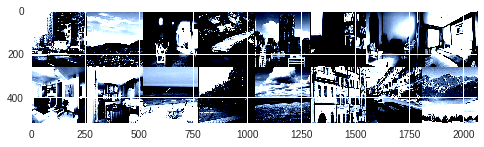

In [10]:
verificar_imagen(dataloaders_11,class_names_11,16,net_11)
verificar_clases(class_names_11,dataloaders_11,net_11)

#### MEJORA 6: Aplique técnicas de Data Augmentation para mejorar la calidad de los datos de entrenamiento. Para realizar nuevas transformaciones, se sugiere utilizar la funcionalidad Compose descrita en http://pytorch.org/docs/master/torchvision/transforms.html

In [0]:
# añadimos algunas transformaciones 
def parametros_dataAugmentation(batch_size, res_factor_x, res_factor_y):
    #data transformation
    Resizing_factor = (res_factor_x,res_factor_y)
    transform = transforms.Compose([
          #transforms.Resize(size=Resizing_factor),
          transforms.RandomRotation(45),
          transforms.RandomResizedCrop(224),
          transforms.RandomHorizontalFlip(),
          transforms.ToTensor(),
          transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
      ])

    #list & load images
    image_datasets = {x: datasets.ImageFolder(os.path.join(dataset_dir, x), transform) for x in ['train', 'val']}
    class_names = image_datasets['train'].classes

    #load & convert images to tensors in Python
    dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size, shuffle=True, num_workers=2) for x in ['train', 'val']}

    return image_datasets, class_names, dataloaders
  

In [9]:
# prueba tras realizar el data augmentation y ver si mejoran los resultados obtenidos
import os
import torch 
from torchvision import datasets
import torchvision.transforms as transforms
import time
import numpy as np
from torch.autograd import Variable
import torch.optim as optim
import torch.nn as nn

image_datasets_12, class_names_12, dataloaders_12 = parametros_dataAugmentation(16, 256, 256)

# función initialize_network con los parámetros lr = 0.001 y momentum = 0.9
net_12, criterion_12, optimizer_12 = initialize_network(dataloaders_12, class_names_12, 0.001, 0.9)

epoch_loss_12, epoch_train_acc_12, epoch_test_acc_12 = entrenamiento(100, 30, image_datasets_12, dataloaders_12, 16, criterion_12, optimizer_12, net_12)

Training in CPUmode #epochs=30 #batches=94 batchsize=16
**** Printing loss every   100 batches ****
Epoch 01, loss: 2.702, accuracy train: 9.200 % (correct 0138 total 1500 ) accuracy test: 9.548 % (correct 0285 total 2985 )
Epoch 02, loss: 2.671, accuracy train: 8.933 % (correct 0134 total 1500 ) accuracy test: 9.648 % (correct 0288 total 2985 )
Epoch 03, loss: 2.638, accuracy train: 12.200 % (correct 0183 total 1500 ) accuracy test: 12.194 % (correct 0364 total 2985 )
Epoch 04, loss: 2.586, accuracy train: 14.933 % (correct 0224 total 1500 ) accuracy test: 14.238 % (correct 0425 total 2985 )
Epoch 05, loss: 2.553, accuracy train: 17.800 % (correct 0267 total 1500 ) accuracy test: 15.879 % (correct 0474 total 2985 )
Epoch 06, loss: 2.514, accuracy train: 17.933 % (correct 0269 total 1500 ) accuracy test: 16.013 % (correct 0478 total 2985 )
Epoch 07, loss: 2.451, accuracy train: 20.600 % (correct 0309 total 1500 ) accuracy test: 18.928 % (correct 0565 total 2985 )
Epoch 08, loss: 2.441,

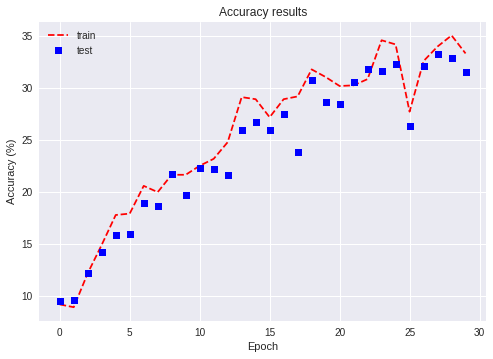

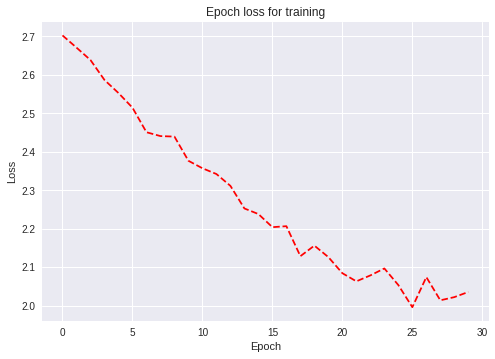

0

In [10]:
import matplotlib.pyplot as plt
import torchvision

analisis_precision(30,epoch_train_acc_12,epoch_test_acc_12,resudir)
funcion_perdidas(resudir,30,epoch_loss_12)

('GroundTruth: ', 'TallBuilding Mountain LivingRoom Industrial Street Coast Store Forest OpenCountry TallBuilding Highway InsideCity Kitchen TallBuilding Forest Mountain')
('Predicted: ', 'Bedroom OpenCountry Kitchen Bedroom Store OpenCountry Store Forest OpenCountry Office Coast Store Office Forest Forest Coast')
Accuracy of Bedroom : 12 %
Accuracy of Coast : 60 %
Accuracy of Forest : 59 %
Accuracy of Highway : 37 %
Accuracy of Industrial :  6 %
Accuracy of InsideCity : 12 %
Accuracy of Kitchen : 61 %
Accuracy of LivingRoom :  5 %
Accuracy of Mountain : 14 %
Accuracy of Office : 48 %
Accuracy of OpenCountry : 50 %
Accuracy of Store : 57 %
Accuracy of Street : 48 %
Accuracy of Suburb : 19 %
Accuracy of TallBuilding : 12 %
Total test data = 2985 images


0

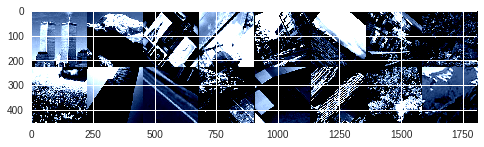

In [11]:
verificar_imagen(dataloaders_12,class_names_12,16,net_12)
verificar_clases(class_names_12,dataloaders_12,net_12)